# Лабораторная работа 1. Введение в машинное обучение. Обучение с учителем. Задача регрессии

<b>Традиционное предупреждение для всех лабораторных работ:</b> перед обучением моделей необходимо выполнить предварительную обработку данных, которая <b>обязательно</b> включает в себя:
- заполнение пропущенных значений (рекомедуется логика заполнения пропусков на основе типа данных, которая использовалась в РГР по Практикуму);
- преобразование категориальных признаков в числовые (используйте one-hot кодирование или map; используйте знания с Практикума).

Предобработка может включать в себя другие действия, но выполнение описанных выше действий обязательно.

Сделайте это один раз и сохраните в отдельный csv файл, а потом его используйте.

<b>Выполните следующие задания:</b>
- загрузите датасет для регрессии, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- вычислите значения метрик $R^2$, MAE, MSE, RMSE, MAPE для всех обученных моделей; выберите лучшую модель;
- самостоятельно реализуйте (желательно в виде класса) модель линейной регрессии с регуляризацией (можете выбрать L1 или L2);
- самостоятельно реализуйте вычисление всех используемых метрик (в виде функций, принимающих два аргумента);
- обучите вашу модель линейной регрессии на ваших данных; оцените качество с помощью реализованных вами метрик.

# Импорт

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# omsky_gamedev

# Основное задание

### Загрузите датасет для регрессии.

In [2]:
models = pd.read_csv('../Data/energy_task_moded_removed_nan.csv')
models

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,year,time
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,6.60,733.5,92.000000,7.000000,63.000000,5.3,11,1,2016,1020
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.48,733.6,92.000000,6.666667,59.166667,5.2,11,1,2016,1030
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.37,733.7,92.000000,6.333333,55.333333,5.1,11,1,2016,1040
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.25,733.8,92.000000,6.000000,51.500000,5.0,11,1,2016,1050
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,6.13,733.9,92.000000,5.666667,47.666667,4.9,11,1,2016,1060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18533,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,22.70,755.2,55.666667,3.333333,23.666667,13.3,27,5,2016,1040
18534,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,22.60,755.2,56.000000,3.500000,24.500000,13.3,27,5,2016,1050
18535,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,22.50,755.2,56.333333,3.666667,25.333333,13.3,27,5,2016,1060
18536,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,22.30,755.2,56.666667,3.833333,26.166667,13.2,27,5,2016,1070


## Решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;

### Разбиваем на выборку

In [3]:
X_train, X_test, y_train, y_test = train_test_split(models.drop('Appliances', axis=1), models['Appliances'], test_size=0.7)


### Обуение

In [4]:
reg = LinearRegression().fit(X_train, y_train)
reg.predict(X_test)

array([108.4425812 ,  41.37707057, 107.77664975, ..., 186.50819186,
        32.60081289, 100.18624385])

### Значения ошибок: <br>
- средней абсолютной ошибки;
- средней квадраттичной ошибки (MSE);
- средней квадраттичной ошибки под корнем (RMSE);
- средней абсолютной процентной ошибки;

In [5]:
print(f"MAE: {mean_absolute_error(reg.predict(X_test), y_test)}",
      f'RMSE: {mean_squared_error(reg.predict(X_test), y_test)}',
      f'MSE: {mean_squared_error(reg.predict(X_test), y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(reg.predict(X_test), y_test)}',
      f'R^2: {reg.score(X_test, y_test)}',
      sep='\n')


MAE: 52.778377979753245
RMSE: 8808.037940068383
MSE: 93.85114778237069
MAPE: 0.5338595337400284
R^2: 0.16678243535899828


### Значение весов.

In [6]:
print(len(reg.coef_), reg.coef_, sep='\n')


29
[ 1.67754085e+00  1.42970740e+00  1.41372462e+01 -1.79652181e+01
 -1.27389975e+01  2.54637672e+01  3.89514041e+00 -1.01692650e+00
 -1.27485983e+00 -4.57758372e-01  1.17061136e-01  6.40901985e+00
  3.05385253e-01 -1.99763351e-01 -2.04633878e+00  3.95106972e+00
 -3.79235026e+00 -9.70922620e+00  2.38876622e-01 -9.95001729e+00
  5.42372365e-02 -1.26173103e+00  5.61325953e-01  1.84915847e-01
  5.67447408e+00 -5.43551371e-02 -8.92594212e+00  0.00000000e+00
  1.79156814e-02]


### Предварительные результаты

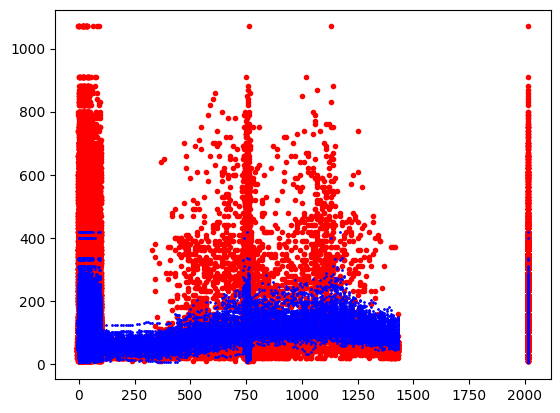

In [7]:
plt.plot(X_test, y_test, 'ro', markersize=3)
plt.plot(X_test, reg.predict(X_test), 'bo', markersize=1)

### Ridge

In [8]:
ridge = Ridge(alpha=0.4).fit(X_train, y_train)
y_result = ridge.predict(X_test)
print(f"MAE: {mean_absolute_error(y_result, y_test)}",
      f'RMSE: {mean_squared_error(y_result, y_test)}',
      f'MSE: {mean_squared_error(y_result, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_result, y_test)}',
      f'R^2: {ridge.score(X_test, y_test)}',
      sep='\n')
ridge.coef_

MAE: 52.778155359477964
RMSE: 8808.047426700261
MSE: 93.85119832319809
MAPE: 0.5338345031550037
R^2: 0.1667815379482055


array([ 1.67765379e+00,  1.42504453e+00,  1.41339506e+01, -1.79534483e+01,
       -1.27337137e+01,  2.54585337e+01,  3.89510364e+00, -1.01865601e+00,
       -1.27588306e+00, -4.59760574e-01,  1.17057758e-01,  6.40676946e+00,
        3.05362328e-01, -2.01031866e-01, -2.04650137e+00,  3.95027401e+00,
       -3.79207125e+00, -9.70511256e+00,  2.39027334e-01, -9.94327227e+00,
        5.41957113e-02, -1.26077402e+00,  5.61704463e-01,  1.84899939e-01,
        5.66865800e+00, -5.41438280e-02, -8.92175531e+00,  0.00000000e+00,
        1.79173105e-02])

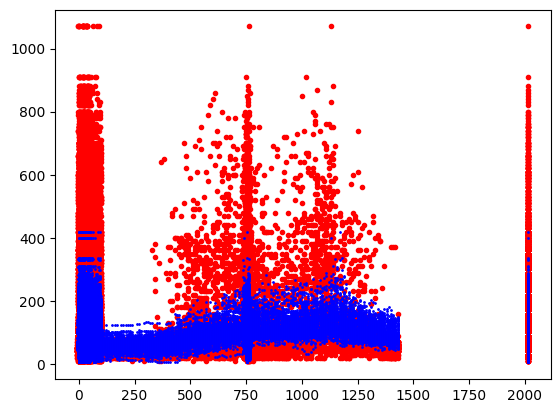

In [9]:
plt.plot(X_test, y_test, 'ro', markersize=3)
plt.plot(X_test, ridge.predict(X_test), 'bo', markersize=1)

### Lasso

In [11]:
lasso = Lasso(alpha=0.7).fit(X_train, y_train)
print(f"MAE: {mean_absolute_error(reg.predict(X_test), y_test)}",
      f'RMSE: {mean_squared_error(reg.predict(X_test), y_test)}',
      f'MSE: {mean_squared_error(reg.predict(X_test), y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(reg.predict(X_test), y_test)}',
      f'R^2: {reg.score(X_test, y_test)}',
      sep='\n')
lasso.coef_

MAE: 52.778377979753245
RMSE: 8808.037940068383
MSE: 93.85114778237069
MAPE: 0.5338595337400284
R^2: 0.16678243535899828


array([ 1.71189326e+00, -0.00000000e+00,  1.26327777e+01, -1.28276298e+01,
       -1.02271687e+01,  2.25592857e+01,  3.17331372e+00, -1.15801745e+00,
       -7.23350299e-01, -1.30945500e+00,  1.04021116e-01,  4.67109702e+00,
        2.77478866e-01, -0.00000000e+00, -2.27989592e+00,  1.58119449e+00,
       -3.47071439e+00, -7.40988835e+00,  0.00000000e+00, -3.69409427e+00,
       -6.49028967e-03, -2.76776242e-01,  7.16699592e-01,  1.79409057e-01,
        0.00000000e+00,  4.81251189e-02, -6.04131165e+00,  0.00000000e+00,
        1.93395487e-02])

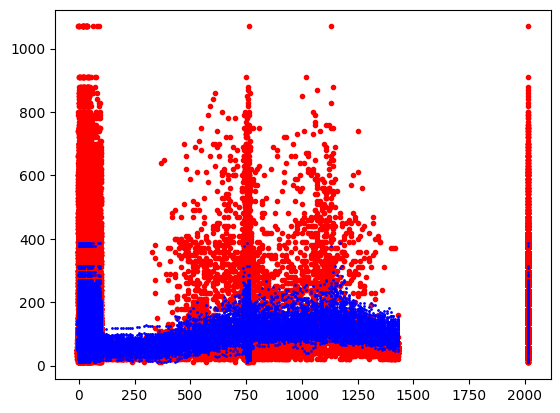

In [12]:
plt.plot(X_test, y_test, 'ro', markersize=3)
plt.plot(X_test, lasso.predict(X_test), 'bo', markersize=1)